In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier

%pylab inline
%matplotlib inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [15]:
iris=datasets.load_iris()
df=pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names']+['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [16]:
df["target"].value_counts()
#type1= setosa, type2= versicolor, type3= virginica

target
0.0    50
1.0    50
2.0    50
Name: count, dtype: int64

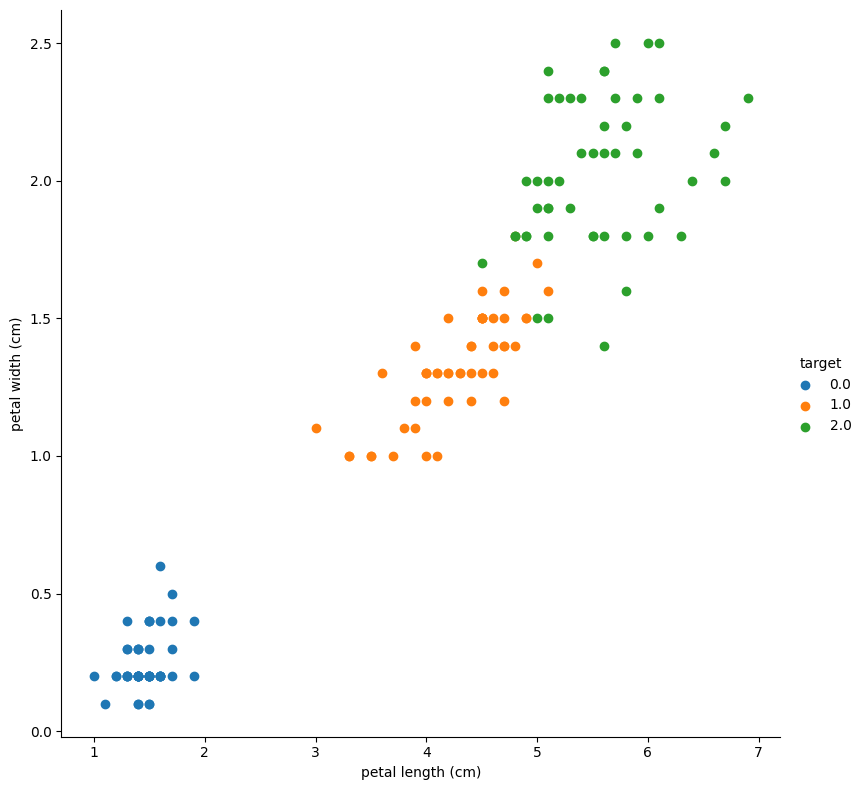

In [17]:
sns.FacetGrid(df, hue="target", height=8).map(plt.scatter, "petal length (cm)", "petal width (cm)").add_legend()

In [22]:
#we can change the value of k here for better model accuracy
model=KNeighborsClassifier(n_neighbors=7)

In [24]:
model.fit(iris.data, iris.target)


KNeighborsClassifier(n_neighbors=7)

In [25]:
#expected = iris.target → ground truth (actual species from dataset).
#predicted = model.predict(iris.data) → model’s guesses.

#expected:  [0, 0, 0, 0, 1, 1, 1, 2, 2, 2]
#predicted: [0, 0, 0, 0, 1, 1, 1, 2, 2, 1]
predicted = model.predict(iris.data)
expected = iris.target
model.score(iris.data, iris.target)

0.9733333333333334

In [21]:
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


In [ ]:
#accuracy is asked in the form of f1-score